<a href="https://colab.research.google.com/github/xPritam07/CODSOFT/blob/main/Movie_Genere_Classification_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Loading basis required libraries***

> Add blockquote



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***Load the dataset***

In [2]:
df_train = pd.read_csv('/content/train_data.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [3]:
df_test = pd.read_csv('/content/test_data.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "DESCRIPTION"])
df_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [4]:
df_test_sol = pd.read_csv('/content/test_data_solution.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])
df_test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
df_test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [8]:
df_train.shape

(54214, 4)

In [9]:
df_test.shape

(54200, 3)

In [10]:
df_test_sol.shape

(54200, 4)

In [11]:
df_train['GENRE'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

# ***EDA***

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['GENRE_ENCODED'] = le.fit_transform(df_train['GENRE'])
df_test_sol['GENRE_ENCODED'] = le.fit_transform(df_test_sol['GENRE'])
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION,GENRE_ENCODED
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,8


In [13]:
df_test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION,GENRE_ENCODED
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart...",24
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi...",5
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...,7
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his...",8
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...,8


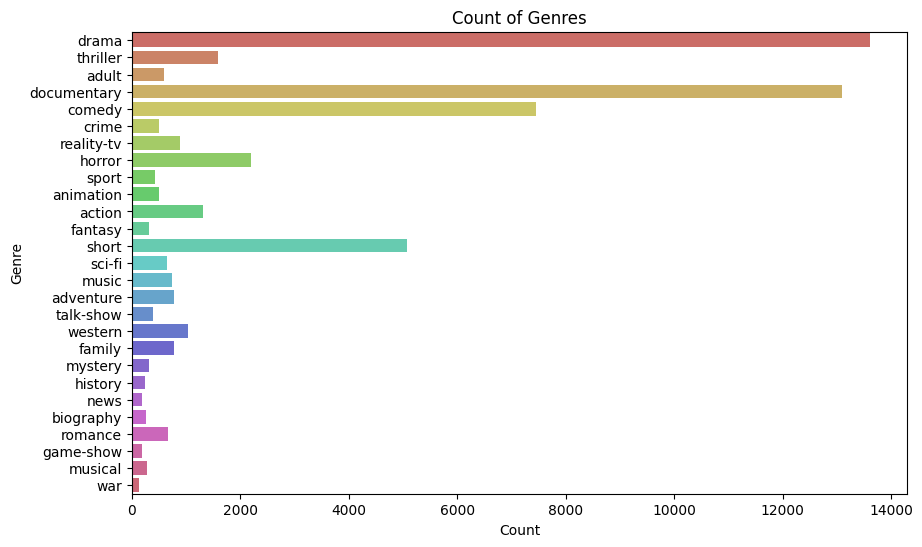

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, y=df_train['GENRE'], palette='hls')
plt.title('Count of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [15]:
def make_lower(text):
    return text.lower()
df_train['DESCRIPTION'] = df_train['DESCRIPTION'].apply(make_lower)
df_test['DESCRIPTION'] = df_test['DESCRIPTION'].apply(make_lower)
df_test_sol['DESCRIPTION'] = df_test_sol['DESCRIPTION'].apply(make_lower)
df_train.head()

,ID,TITLE,GENRE,DESCRIPTION,GENRE_ENCODED
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...,8
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous re...,24
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...,1
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...,8
4,5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...,8


In [16]:
df_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"l.r. brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"spain, march 1964: quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),one year in the life of albin and his family o...
3,4,Meu Amigo Hindu (2015),"his father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),before he was known internationally as a marti...


In [17]:
df_test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION,GENRE_ENCODED
0,1,Edgar's Lunch (1998),thriller,"l.r. brane loves his life - his car, his apart...",24
1,2,La guerra de papá (1977),comedy,"spain, march 1964: quico is a very naughty chi...",5
2,3,Off the Beaten Track (2010),documentary,one year in the life of albin and his family o...,7
3,4,Meu Amigo Hindu (2015),drama,"his father has died, he hasn't spoken with his...",8
4,5,Er nu zhai (1955),drama,before he was known internationally as a marti...,8


# ***Import the required libraries for Model training***


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [19]:
X_train = df_train['DESCRIPTION']
X_test = df_test['DESCRIPTION']
y_train = df_train['GENRE_ENCODED']
y_test = df_test_sol['GENRE_ENCODED']

In [20]:
tfidf = TfidfVectorizer(max_features=20000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

In [21]:
model_logistic = LogisticRegression(random_state=25, max_iter=10000, n_jobs=1)
model_logistic.fit(X_train_tfidf, y_train)
y_pred = model_logistic.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.589870848708487
Classification Report:
               precision    recall  f1-score   support

      action       0.52      0.28      0.36      1314
       adult       0.63      0.23      0.33       590
   adventure       0.69      0.15      0.25       775
   animation       0.57      0.04      0.08       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.59      0.57      7446
       crime       0.39      0.02      0.04       505
 documentary       0.67      0.86      0.75     13096
       drama       0.54      0.79      0.64     13612
      family       0.55      0.08      0.14       783
     fantasy       0.52      0.03      0.06       322
   game-show       0.92      0.48      0.63       193
     history       0.00      0.00      0.00       243
      horror       0.66      0.58      0.62      2204
       music       0.70      0.42      0.53       731
     musical       0.38      0.01      0.02       276
     mystery       0.20      

Confusion Matrix:
 [[  365     2     6     1     0   129     3   151   508     1     0     0
      0    39     0     0     0     0     2     0    18    47     7     0
     29     0     6]
 [    3   133    14     0     0   195     0    42   149     0     0     0
      0     5     1     0     0     0     0     1     1    43     1     0
      2     0     0]
 [   34    36   120     3     0   115     0   140   224     5     4     0
      0    27     0     0     0     0     5     0     7    39     1     0
     10     0     5]
 [   28     0     8    20     0   132     0    79   110    12     4     0
      0    18     2     0     0     0     1     0    18    65     0     0
      1     0     0]
 [    0     0     0     0     0    13     0   174    64     0     0     0
      0     1     2     0     0     0     0     0     0     9     1     0
      0     0     0]
 [   50     3     1     1     0  4402     2   441  2181     7     0     1
      0    65    11     0     1     0    14     4    12   219 

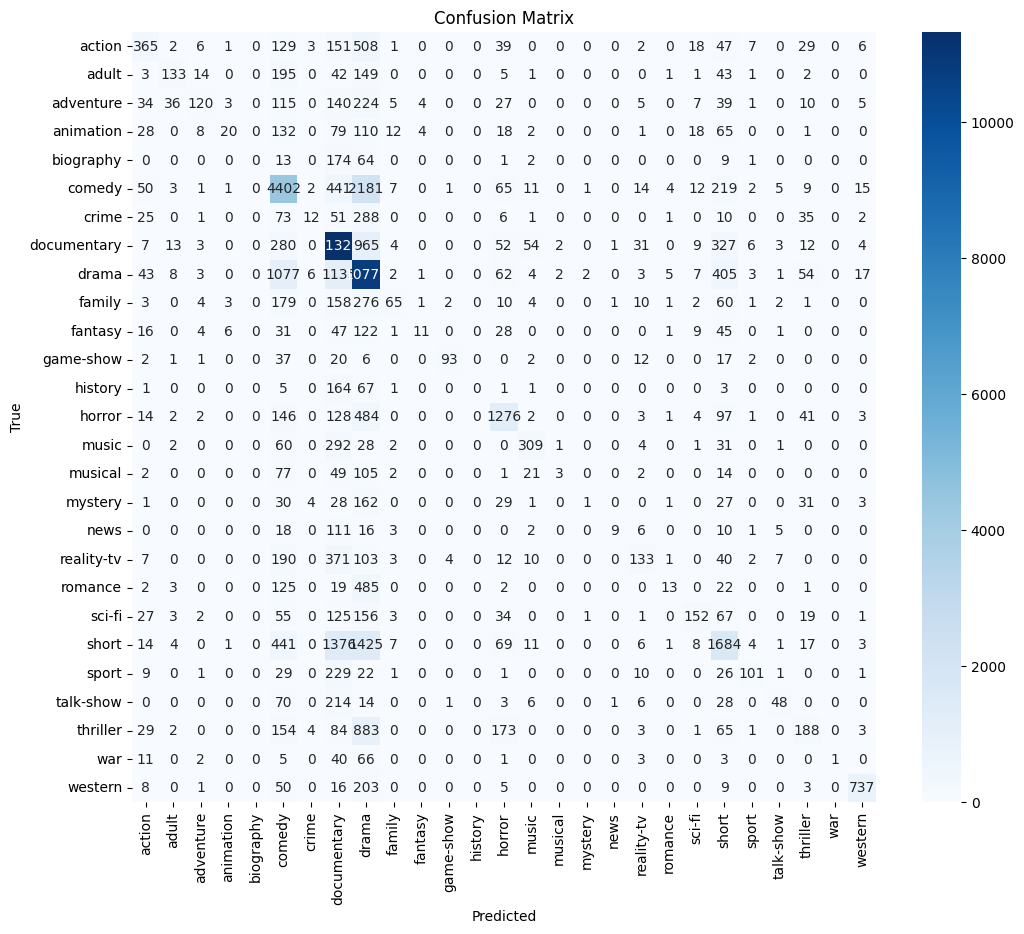

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model_logistic.classes_)
print("Confusion Matrix:\n", cm)

# Display as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()